**Task #3: Exploratory Data Analysis-Super Store**


**By: Syed Hamad ul Haq Andrabi**

**Importing Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True)

**Importing the Dataset**

In [87]:
df = pd.read_csv(r"C:\Users\asus\Downloads\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [88]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [89]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [90]:
#df = df.rename(columns = {'Sub-Category': 'SubCategory'}, inplace=True)
df = df.rename(columns={'Sub-Category': 'SubCategory'})

In [91]:
df = df.drop(["Country","Postal Code"], axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [92]:
df.shape

(9994, 11)

In [93]:
duplicate_df = df[df.duplicated()]
print("Number of Duplicated rows: ", duplicate_df.shape)

Number of Duplicated rows:  (50, 11)


In [94]:
df.count()

Ship Mode      9994
Segment        9994
City           9994
State          9994
Region         9994
Category       9994
SubCategory    9994
Sales          9994
Quantity       9994
Discount       9994
Profit         9994
dtype: int64

In [95]:
df = df.drop_duplicates()
df.head()

,Ship Mode,Segment,City,State,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [96]:
df.count()

Ship Mode      9944
Segment        9944
City           9944
State          9944
Region         9944
Category       9944
SubCategory    9944
Sales          9944
Quantity       9944
Discount       9944
Profit         9944
dtype: int64

In [97]:
print(df.isnull().sum())

Ship Mode      0
Segment        0
City           0
State          0
Region         0
Category       0
SubCategory    0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64


**Boxplot**

<AxesSubplot:xlabel='Profit'>

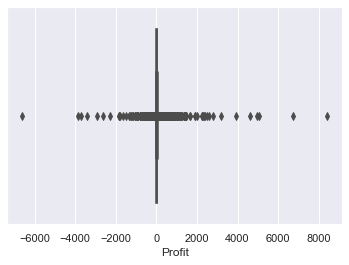

In [98]:
sns.boxplot(x=df["Profit"])

<AxesSubplot:xlabel='Sales'>

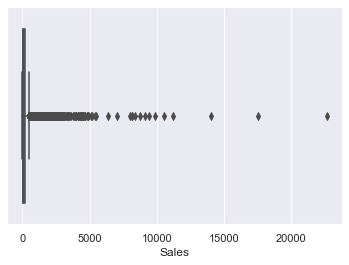

In [99]:
sns.boxplot(x=df["Sales"])

<AxesSubplot:xlabel='Discount'>

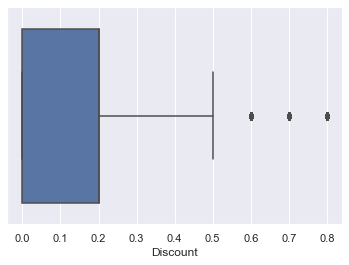

In [100]:
sns.boxplot(x=df["Discount"])

**Barchart**

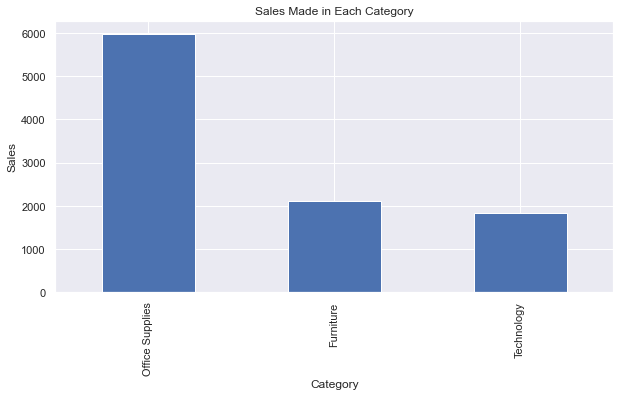

In [101]:
df.Category.value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Sales Made in Each Category")
plt.ylabel("Sales")
plt.xlabel("Category");

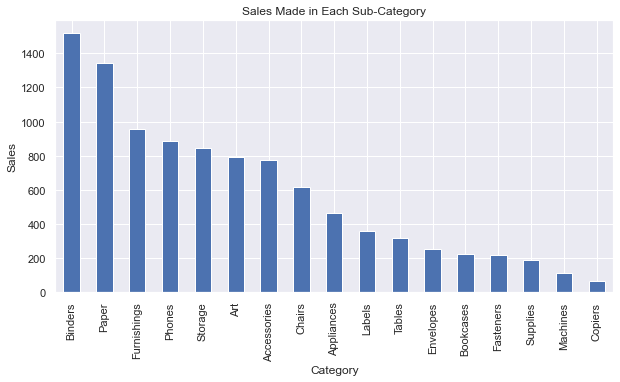

In [102]:
df.SubCategory.value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Sales Made in Each Sub-Category")
plt.ylabel("Sales")
plt.xlabel("Category");

Text(0.5, 0, 'S')

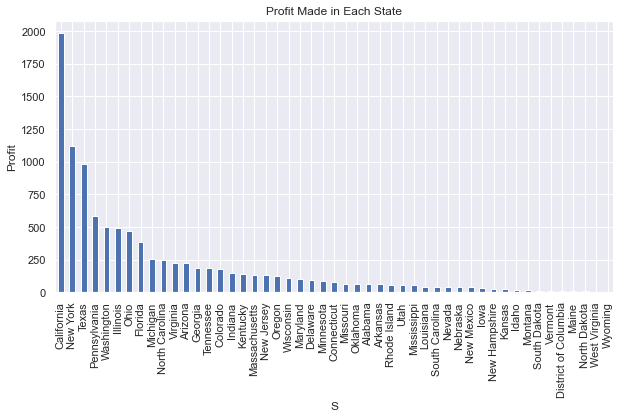

In [106]:
df.State.value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title("Profit Made in Each State")
plt.ylabel("Profit")
plt.xlabel("S")

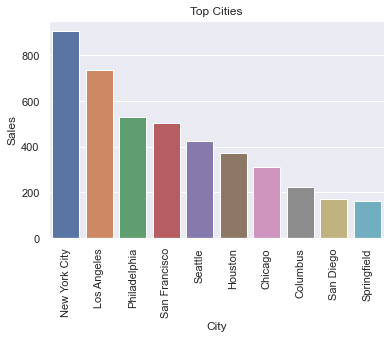

In [56]:
top_ten = df.groupby("City").size().sort_values(ascending=False).head(10)
top_ten_df = pd.DataFrame(top_ten.reset_index(name="Sales"))
plt.title('Top Cities')
plt.ylabel('Sales')
plt.xticks(rotation=90)
sns.barplot(x='City', y='Sales', data=top_ten_df);

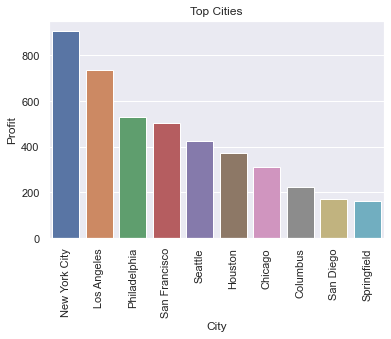

In [51]:
top_ten = df.groupby("City").size().sort_values(ascending=False).head(10)
top_ten_df = pd.DataFrame(top_ten.reset_index(name="Profit"))
plt.title('Top Cities')
plt.ylabel('Profit')
plt.xticks(rotation=90)
sns.barplot(x='City', y='Profit', data=top_ten_df);

**Scatterplot**

Text(0, 0.5, 'Sales')

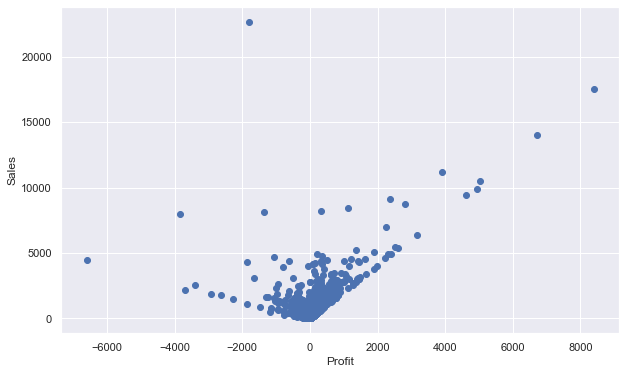

In [54]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Profit'], df['Sales'])
ax.set_xlabel('Profit')
ax.set_ylabel('Sales')

**Heatmap**

In [107]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,SubCategory,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


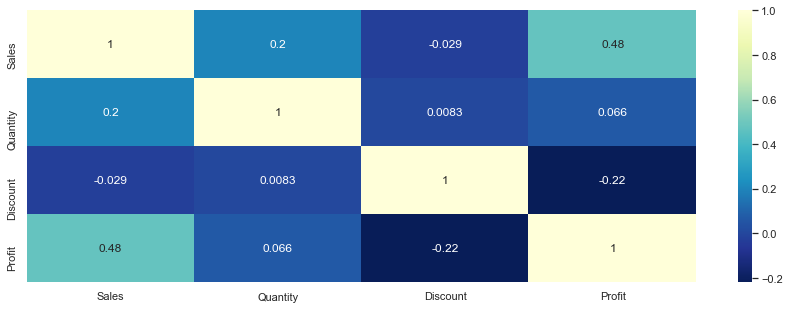

In [110]:
#find the relation between the variables
plt.figure(figsize=(15,5))
c = df.corr()
sns.heatmap(c,cmap="YlGnBu_r", annot=True)
c